In [1]:
# ondoing main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import jupyterthemes as jt
# from jupyterthemes import jtplot
# !jt -t onedork -ofs 10 -dfs 9 -nfs 11 -tfs 11
# jtplot.style(theme = 'onedork', fscale = 1.4 , context = 'notebook', ticks = True, 
#              grid = False)

In [3]:
!jt -r

Reset css and font defaults in:
/home/tater/.jupyter/custom &
/home/tater/.local/share/jupyter/nbextensions


In [4]:
# hiding possible warning in the system
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_1 = pd.read_csv("Cryofreezer_all_variables_29.csv", delimiter=',')
df_2 = pd.read_csv("Cryofreezer_all_variables_30.csv", delimiter=',')
df_3 = pd.read_csv("Cryofreezer_all_variables_31.csv", delimiter=',')
df_4 = pd.read_csv("Cryofreezer_all_variables_32.csv", delimiter=',')
df_5 = pd.read_csv("Cryofreezer_all_variables_33.csv", delimiter=',')

In [6]:
# entering a deltatime between to moments of experiments
def deltatime(dataframe):
    begin = dataframe[0]
    for i in range(len(dataframe)):   
        cur = dataframe[i]
        delta = cur - begin
        dataframe[i] = delta.seconds

In [7]:
#file concatanation
df_all = df_1
df_all

,BeltAmpere_belt1,BeltAmpere_belt1_qc,BeltAmpere_belt2,BeltAmpere_belt2_qc,BeltAmpere_belt3,BeltAmpere_belt3_qc,Cumulative_LIN_flow,Cumulative_LIN_flow_qc,Cumulative_product_flow,Cumulative_product_flow_qc,...,Temp_product_in_qc,Temp_product_out,Temp_product_out_qc,Temp_tunnel_measured,Temp_tunnel_measured_qc,Temp_tunnel_set,Temp_tunnel_set_qc,Vanne_opening_rate,Vanne_opening_rate_qc,_time
0,0.002441,0,0.002441,0,0.002441,0,317404,0,158249,0,...,0,0.000000,0,16.9,0,0,0,0.000000,0,2020-09-04T20:56:07.400Z
1,0.000000,-2138963968,0.000000,-2138963968,0.000000,-2138963968,0,-2138963968,0,-2138963968,...,-2138963968,0.000000,-2138963968,0.0,-2138963968,0,-2138963968,0.000000,-2138963968,2020-09-04T20:57:07.338Z
2,0.000000,-2138963968,0.000000,-2138963968,0.000000,-2138963968,0,-2138963968,0,-2138963968,...,-2138963968,0.000000,-2138963968,0.0,-2138963968,0,-2138963968,0.000000,-2138963968,2020-09-04T20:58:28.422Z
3,0.002441,0,0.002441,0,0.002441,0,317404,0,158249,0,...,0,7.590608,0,15.0,0,0,0,0.000000,0,2020-09-04T20:59:07.374Z
4,0.000000,-2138963968,0.000000,-2138963968,0.000000,-2138963968,0,-2138963968,0,-2138963968,...,-2138963968,0.000000,-2138963968,0.0,-2138963968,0,-2138963968,0.000000,-2138963968,2020-09-04T21:00:28.093Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,-2138963968,0.000000,-2138963968,0.000000,-2138963968,0,-2138963968,0,-2138963968,...,-2138963968,0.000000,-2138963968,0.0,-2138963968,0,-2138963968,0.000000,-2138963968,2020-09-10T10:11:48.233Z
7996,2.424927,0,3.586426,0,3.527832,0,348959,0,175974,0,...,0,-21.489439,0,-85.9,0,-86,0,25.934847,0,2020-09-10T10:12:48.266Z
7997,0.000000,-2138963968,0.000000,-2138963968,0.000000,-2138963968,0,-2138963968,0,-2138963968,...,-2138963968,0.000000,-2138963968,0.0,-2138963968,0,-2138963968,0.000000,-2138963968,2020-09-10T10:13:48.240Z
7998,2.425537,0,3.657837,0,3.540039,0,348988,0,175995,0,...,0,-23.823202,0,-85.9,0,-86,0,24.692324,0,2020-09-10T10:14:48.312Z


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BeltAmpere_belt1            8000 non-null   float64
 1   BeltAmpere_belt1_qc         8000 non-null   int64  
 2   BeltAmpere_belt2            8000 non-null   float64
 3   BeltAmpere_belt2_qc         8000 non-null   int64  
 4   BeltAmpere_belt3            8000 non-null   float64
 5   BeltAmpere_belt3_qc         8000 non-null   int64  
 6   Cumulative_LIN_flow         8000 non-null   int64  
 7   Cumulative_LIN_flow_qc      8000 non-null   int64  
 8   Cumulative_product_flow     8000 non-null   int64  
 9   Cumulative_product_flow_qc  8000 non-null   int64  
 10  FanAmpere_exhaust1          8000 non-null   float64
 11  FanAmpere_exhaust1_qc       8000 non-null   int64  
 12  FanAmpere_exhaust2          8000 non-null   float64
 13  FanAmpere_exhaust2_qc       8000 

In [9]:
df_all_short = df_all.iloc[:, ::2]
df_all_short

,BeltAmpere_belt1,BeltAmpere_belt2,BeltAmpere_belt3,Cumulative_LIN_flow,Cumulative_product_flow,FanAmpere_exhaust1,FanAmpere_exhaust2,FanAmpere_side,FanAmpere_top,Fanspeed_exhaust1,...,ResidenceTime_belt2,ResidenceTime_belt3,Temp_exhaust_in,Temp_exhaust_out,Temp_product_in,Temp_product_out,Temp_tunnel_measured,Temp_tunnel_set,Vanne_opening_rate,_time
0,0.002441,0.002441,0.002441,317404,158249,0.002182,0.002618,0.000000,0.000000,0,...,0,0,17.1,14.3,10.357108,0.000000,16.9,0,0.000000,2020-09-04T20:56:07.400Z
1,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-04T20:57:07.338Z
2,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-04T20:58:28.422Z
3,0.002441,0.002441,0.002441,317404,158249,0.002182,0.002618,0.000000,0.000000,0,...,0,0,16.7,13.8,12.060572,7.590608,15.0,0,0.000000,2020-09-04T20:59:07.374Z
4,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-04T21:00:28.093Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-10T10:11:48.233Z
7996,2.424927,3.586426,3.527832,348959,175974,2.144040,2.456940,8.002167,8.134003,50,...,150,150,-1.7,4.4,12.040358,-21.489439,-85.9,-86,25.934847,2020-09-10T10:12:48.266Z
7997,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-10T10:13:48.240Z
7998,2.425537,3.657837,3.540039,348988,175995,2.141422,2.458249,8.002167,8.129883,50,...,150,150,-1.3,4.8,12.768709,-23.823202,-85.9,-86,24.692324,2020-09-10T10:14:48.312Z


In [10]:
df_all_short["_time"] = pd.to_datetime(df_all_short["_time"])

In [11]:
df_all_short

,BeltAmpere_belt1,BeltAmpere_belt2,BeltAmpere_belt3,Cumulative_LIN_flow,Cumulative_product_flow,FanAmpere_exhaust1,FanAmpere_exhaust2,FanAmpere_side,FanAmpere_top,Fanspeed_exhaust1,...,ResidenceTime_belt2,ResidenceTime_belt3,Temp_exhaust_in,Temp_exhaust_out,Temp_product_in,Temp_product_out,Temp_tunnel_measured,Temp_tunnel_set,Vanne_opening_rate,_time
0,0.002441,0.002441,0.002441,317404,158249,0.002182,0.002618,0.000000,0.000000,0,...,0,0,17.1,14.3,10.357108,0.000000,16.9,0,0.000000,2020-09-04 20:56:07.400000+00:00
1,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-04 20:57:07.338000+00:00
2,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-04 20:58:28.422000+00:00
3,0.002441,0.002441,0.002441,317404,158249,0.002182,0.002618,0.000000,0.000000,0,...,0,0,16.7,13.8,12.060572,7.590608,15.0,0,0.000000,2020-09-04 20:59:07.374000+00:00
4,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-04 21:00:28.093000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-10 10:11:48.233000+00:00
7996,2.424927,3.586426,3.527832,348959,175974,2.144040,2.456940,8.002167,8.134003,50,...,150,150,-1.7,4.4,12.040358,-21.489439,-85.9,-86,25.934847,2020-09-10 10:12:48.266000+00:00
7997,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.000000,2020-09-10 10:13:48.240000+00:00
7998,2.425537,3.657837,3.540039,348988,175995,2.141422,2.458249,8.002167,8.129883,50,...,150,150,-1.3,4.8,12.768709,-23.823202,-85.9,-86,24.692324,2020-09-10 10:14:48.312000+00:00


In [12]:
df_all_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   BeltAmpere_belt1         8000 non-null   float64            
 1   BeltAmpere_belt2         8000 non-null   float64            
 2   BeltAmpere_belt3         8000 non-null   float64            
 3   Cumulative_LIN_flow      8000 non-null   int64              
 4   Cumulative_product_flow  8000 non-null   int64              
 5   FanAmpere_exhaust1       8000 non-null   float64            
 6   FanAmpere_exhaust2       8000 non-null   float64            
 7   FanAmpere_side           8000 non-null   float64            
 8   FanAmpere_top            8000 non-null   float64            
 9   Fanspeed_exhaust1        8000 non-null   int64              
 10  Fanspeed_exhaust2        8000 non-null   int64              
 11  Fanspeed_side            8000 

In [13]:
x_time = df_all_short["_time"]
y_LIN = df_all_short["LIN_flow"]
y_PROD = df_all_short["Product_flow"]

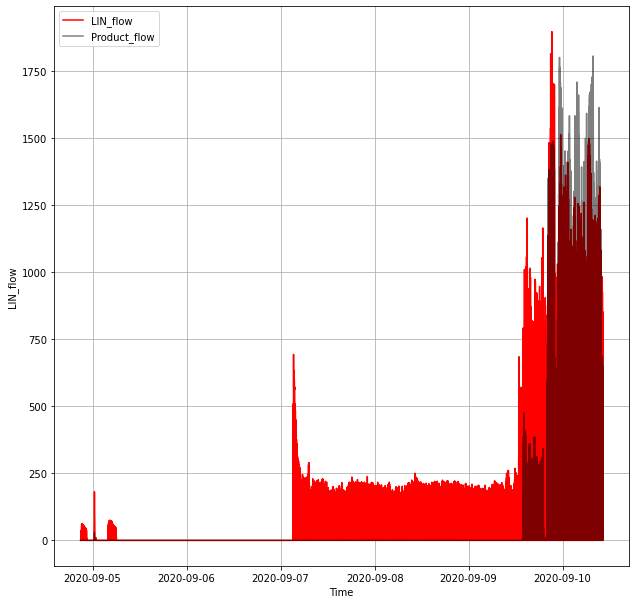

In [14]:
plt.figure(figsize=(35, 35))
ax = plt.subplot(3,3,3)
plt.plot(x_time, y_LIN, color="red", label="LIN_flow")
plt.plot(x_time, y_PROD, color="black", label="Product_flow", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("LIN_flow")
plt.grid(True)
plt.legend()

In [15]:
df_w_o_prod_flow = df_all_short[df_all_short["Product_flow"] >= 1.175381e-33]

In [16]:
df_w_o_prod_flow = df_w_o_prod_flow[df_all_short["Product_flow"] != 0]

In [17]:
df_w_o_prod_flow.shape

(874, 26)

In [18]:
df_w_o_prod_flow.reset_index(inplace=True, drop=True)

In [19]:
df_w_o_prod_flow

,BeltAmpere_belt1,BeltAmpere_belt2,BeltAmpere_belt3,Cumulative_LIN_flow,Cumulative_product_flow,FanAmpere_exhaust1,FanAmpere_exhaust2,FanAmpere_side,FanAmpere_top,Fanspeed_exhaust1,...,ResidenceTime_belt2,ResidenceTime_belt3,Temp_exhaust_in,Temp_exhaust_out,Temp_product_in,Temp_product_out,Temp_tunnel_measured,Temp_tunnel_set,Vanne_opening_rate,_time
0,1.570435,1.475830,1.376343,317404,158249,3.082739,3.447571,8.164215,8.456726,100,...,60,60,13.0,12.5,0.000000,0.000000,11.9,10,8.152407,2020-09-05 00:22:07.311000+00:00
1,1.569214,1.478882,1.375732,317404,158249,3.013788,3.401749,8.146362,8.444366,100,...,60,60,12.4,11.1,0.000000,0.000000,11.7,10,18.132671,2020-09-05 00:23:08.729000+00:00
2,1.570435,1.483154,1.378784,317404,158249,3.031244,3.449317,8.101044,8.422394,100,...,60,60,12.3,10.9,0.000000,0.000000,11.5,10,29.087076,2020-09-05 00:24:07.310000+00:00
3,1.571045,1.483765,1.379395,317407,158249,3.035608,3.482919,8.121643,8.415527,100,...,60,60,12.1,10.9,0.000000,0.000000,11.1,10,35.764454,2020-09-05 00:25:08.745000+00:00
4,1.569824,1.484985,1.382446,317410,158249,3.017715,3.401312,8.095551,8.432007,100,...,60,60,11.8,11.1,0.000000,0.000000,10.7,10,38.100580,2020-09-05 00:26:07.315000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,2.423096,3.612061,3.531494,348917,175943,2.134876,2.453012,8.013153,8.144989,50,...,150,150,-2.1,4.7,10.797113,0.000000,-85.7,-86,27.456482,2020-09-10 10:09:48.272000+00:00
870,2.424316,3.628540,3.525391,348930,175953,2.142731,2.453885,7.998047,8.136749,50,...,150,150,-1.7,4.7,11.044087,-16.853040,-85.9,-86,22.515778,2020-09-10 10:10:48.277000+00:00
871,2.424927,3.586426,3.527832,348959,175974,2.144040,2.456940,8.002167,8.134003,50,...,150,150,-1.7,4.4,12.040358,-21.489439,-85.9,-86,25.934847,2020-09-10 10:12:48.266000+00:00
872,2.425537,3.657837,3.540039,348988,175995,2.141422,2.458249,8.002167,8.129883,50,...,150,150,-1.3,4.8,12.768709,-23.823202,-85.9,-86,24.692324,2020-09-10 10:14:48.312000+00:00


In [20]:
df_w_o_prod_flow[["LIN_flow", "Product_flow", "Cumulative_LIN_flow", "Cumulative_product_flow", "_time"]].head()

,LIN_flow,Product_flow,Cumulative_LIN_flow,Cumulative_product_flow,_time
0,6.517969,0.418350,317404,158249,2020-09-05 00:22:07.311000+00:00
1,28.976774,1.302090,317404,158249,2020-09-05 00:23:08.729000+00:00
2,53.076607,1.991233,317404,158249,2020-09-05 00:24:07.310000+00:00
3,102.567280,2.896480,317407,158249,2020-09-05 00:25:08.745000+00:00
4,142.960620,2.801739,317410,158249,2020-09-05 00:26:07.315000+00:00


In [21]:
df_w_o_prod_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   BeltAmpere_belt1         874 non-null    float64            
 1   BeltAmpere_belt2         874 non-null    float64            
 2   BeltAmpere_belt3         874 non-null    float64            
 3   Cumulative_LIN_flow      874 non-null    int64              
 4   Cumulative_product_flow  874 non-null    int64              
 5   FanAmpere_exhaust1       874 non-null    float64            
 6   FanAmpere_exhaust2       874 non-null    float64            
 7   FanAmpere_side           874 non-null    float64            
 8   FanAmpere_top            874 non-null    float64            
 9   Fanspeed_exhaust1        874 non-null    int64              
 10  Fanspeed_exhaust2        874 non-null    int64              
 11  Fanspeed_side            874 non

In [22]:
x_time = df_w_o_prod_flow["_time"]
y_LIN = df_w_o_prod_flow["LIN_flow"]
y_PROD = df_w_o_prod_flow["Product_flow"]

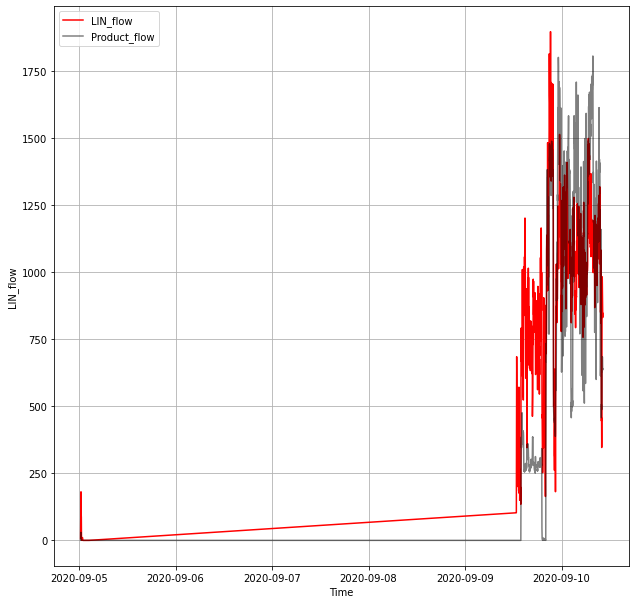

In [23]:
plt.figure(figsize=(35, 35))
ax = plt.subplot(3,3,3)
plt.plot(x_time, y_LIN, color="red", label="LIN_flow")
plt.plot(x_time, y_PROD, color="black", label="Product_flow", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("LIN_flow")
plt.grid(True)
plt.legend()

In [24]:
df_w_o_prod_flow.describe()
named_cols = df_w_o_prod_flow.columns[:-1]
named_cols

Index(['BeltAmpere_belt1', 'BeltAmpere_belt2', 'BeltAmpere_belt3',
       'Cumulative_LIN_flow', 'Cumulative_product_flow', 'FanAmpere_exhaust1',
       'FanAmpere_exhaust2', 'FanAmpere_side', 'FanAmpere_top',
       'Fanspeed_exhaust1', 'Fanspeed_exhaust2', 'Fanspeed_side',
       'Fanspeed_top', 'LIN_flow', 'Product_flow', 'ResidenceTime_belt1',
       'ResidenceTime_belt2', 'ResidenceTime_belt3', 'Temp_exhaust_in',
       'Temp_exhaust_out', 'Temp_product_in', 'Temp_product_out',
       'Temp_tunnel_measured', 'Temp_tunnel_set', 'Vanne_opening_rate'],
      dtype='object')

In [25]:
#Данные чистые, пустых значений нет
df_w_o_prod_flow.isnull().values.any()
df_w_o_prod_flow["_time"] = pd.to_datetime(df_w_o_prod_flow["_time"])

In [26]:
y = df_w_o_prod_flow["LIN_flow"]
x = df_w_o_prod_flow

In [27]:
print('Матрица корреляций всех признаков, кроме последнего:\n', x.iloc[:, :-1].corr())
print('\n')

print(x.shape)

Матрица корреляций всех признаков, кроме последнего:
                          BeltAmpere_belt1  BeltAmpere_belt2  BeltAmpere_belt3  \
BeltAmpere_belt1                 1.000000          0.926078          0.921953   
BeltAmpere_belt2                 0.926078          1.000000          0.999331   
BeltAmpere_belt3                 0.921953          0.999331          1.000000   
Cumulative_LIN_flow              0.579312          0.741231          0.732469   
Cumulative_product_flow          0.230664          0.368482          0.354711   
FanAmpere_exhaust1               0.758829          0.768707          0.763121   
FanAmpere_exhaust2               0.709380          0.742218          0.737191   
FanAmpere_side                   0.883557          0.919990          0.915708   
FanAmpere_top                    0.885448          0.915484          0.911025   
Fanspeed_exhaust1                0.404242          0.477891          0.473229   
Fanspeed_exhaust2                0.551646          0.67

In [28]:
corr_ = x.corrwith(y, method='spearman')
sa = dict(corr_).items()
sorted(sa, key = lambda x : x[1])

[('Temp_tunnel_set', -0.5883647948858682),
 ('Temp_exhaust_out', -0.5744010100856227),
 ('Temp_tunnel_measured', -0.551003603450358),
 ('Temp_product_out', -0.42135578994203),
 ('Temp_exhaust_in', -0.2736481432556655),
 ('FanAmpere_top', 0.16512379500730376),
 ('BeltAmpere_belt3', 0.2685042403854621),
 ('ResidenceTime_belt2', 0.2829820116116096),
 ('ResidenceTime_belt3', 0.28420267080207817),
 ('FanAmpere_exhaust1', 0.3089816826689902),
 ('ResidenceTime_belt1', 0.3124563780202656),
 ('Fanspeed_side', 0.3205265622528417),
 ('FanAmpere_exhaust2', 0.4114466819594148),
 ('BeltAmpere_belt1', 0.419842636652969),
 ('Fanspeed_top', 0.4373152052841255),
 ('FanAmpere_side', 0.4757800500911842),
 ('Fanspeed_exhaust2', 0.4976963692128322),
 ('Fanspeed_exhaust1', 0.5059596320361883),
 ('Vanne_opening_rate', 0.5389263167217495),
 ('BeltAmpere_belt2', 0.5547686763402422),
 ('Cumulative_product_flow', 0.6741843959463496),
 ('Cumulative_LIN_flow', 0.6765392617798859),
 ('Temp_product_in', 0.77140997470

In [29]:
x[['Temp_exhaust_out', 'Temp_product_in', 'Temp_tunnel_set', 'Temp_exhaust_in', 'BeltAmpere_belt2', 'LIN_flow']].corr()

,Temp_exhaust_out,Temp_product_in,Temp_tunnel_set,Temp_exhaust_in,BeltAmpere_belt2,LIN_flow
Temp_exhaust_out,1.000000,-0.527616,0.602512,0.050509,-0.485545,-0.600602
Temp_product_in,-0.527616,1.000000,-0.521148,-0.108745,0.395528,0.766707
Temp_tunnel_set,0.602512,-0.521148,1.000000,0.619998,-0.897740,-0.789959
Temp_exhaust_in,0.050509,-0.108745,0.619998,1.000000,-0.592762,-0.448574
BeltAmpere_belt2,-0.485545,0.395528,-0.897740,-0.592762,1.000000,0.693127
LIN_flow,-0.600602,0.766707,-0.789959,-0.448574,0.693127,1.000000


<AxesSubplot:>

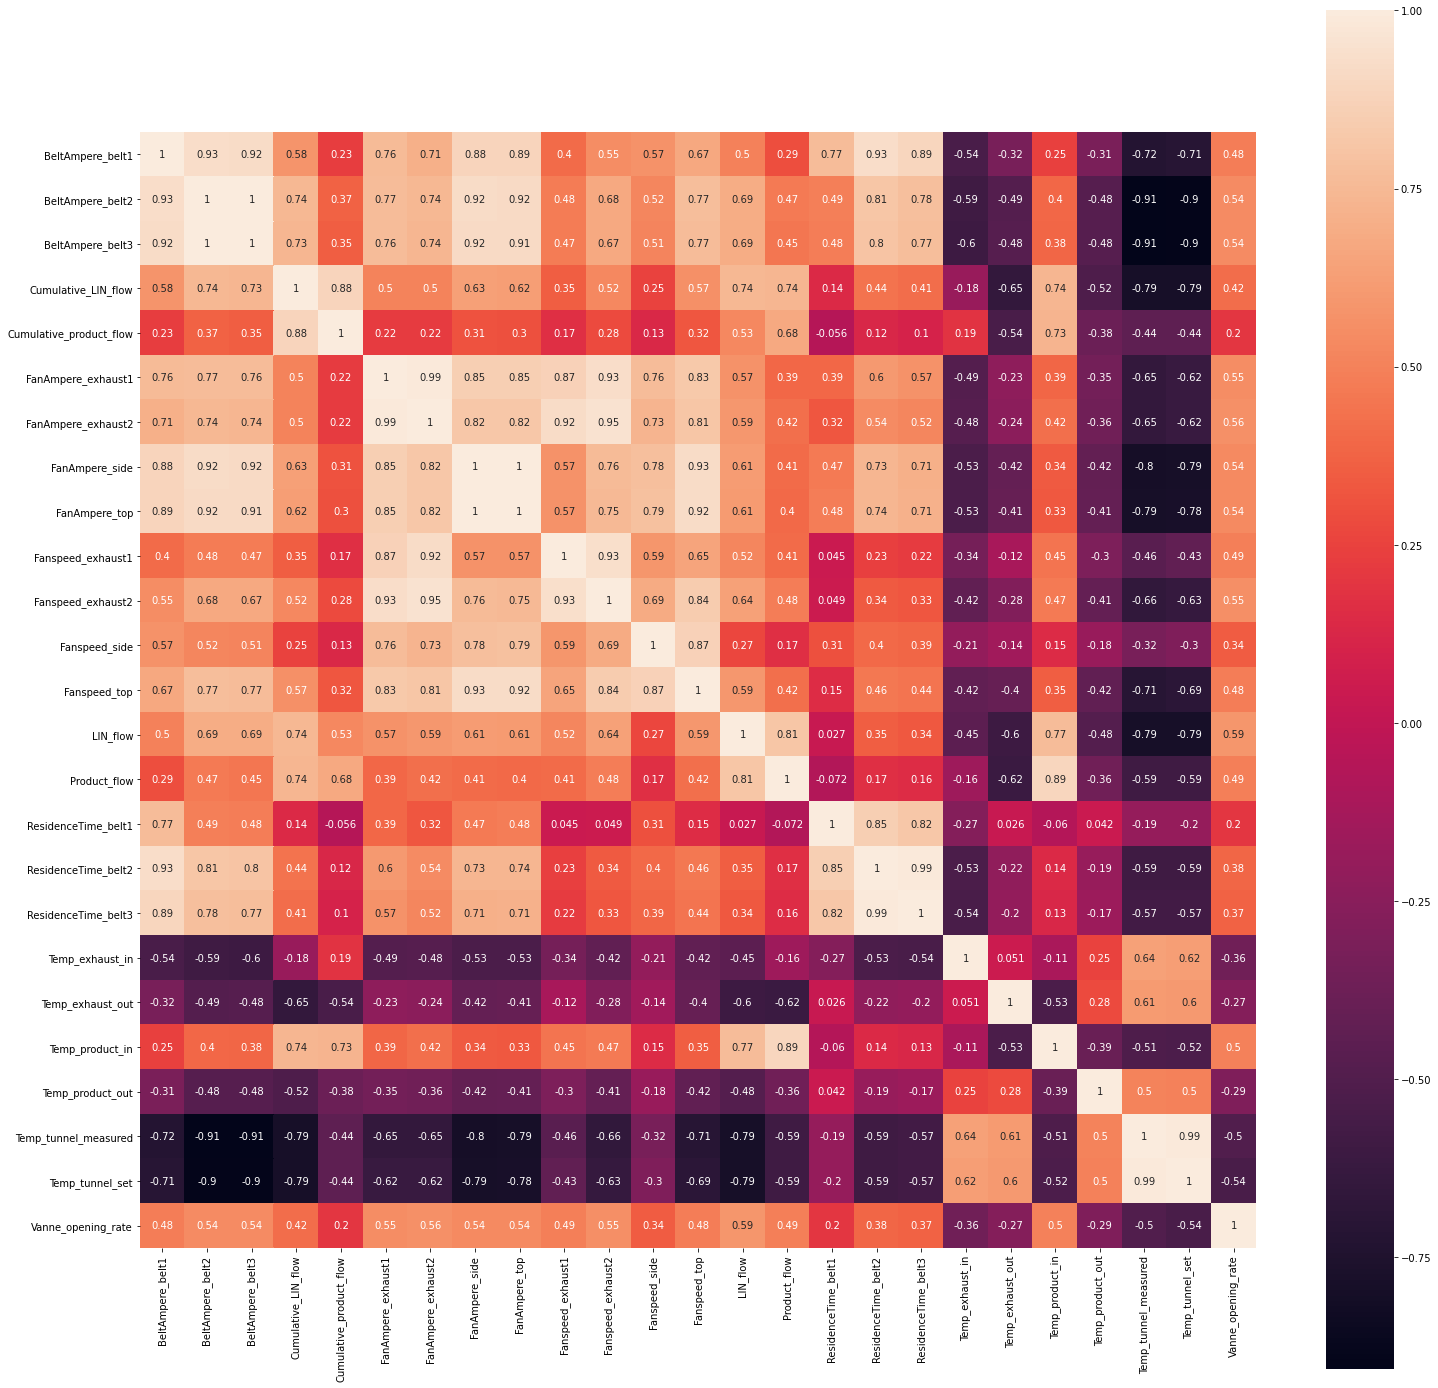

In [30]:
plt.figure(figsize=(25, 25))
sns.heatmap(x[::].corr(), square=True, annot=True)

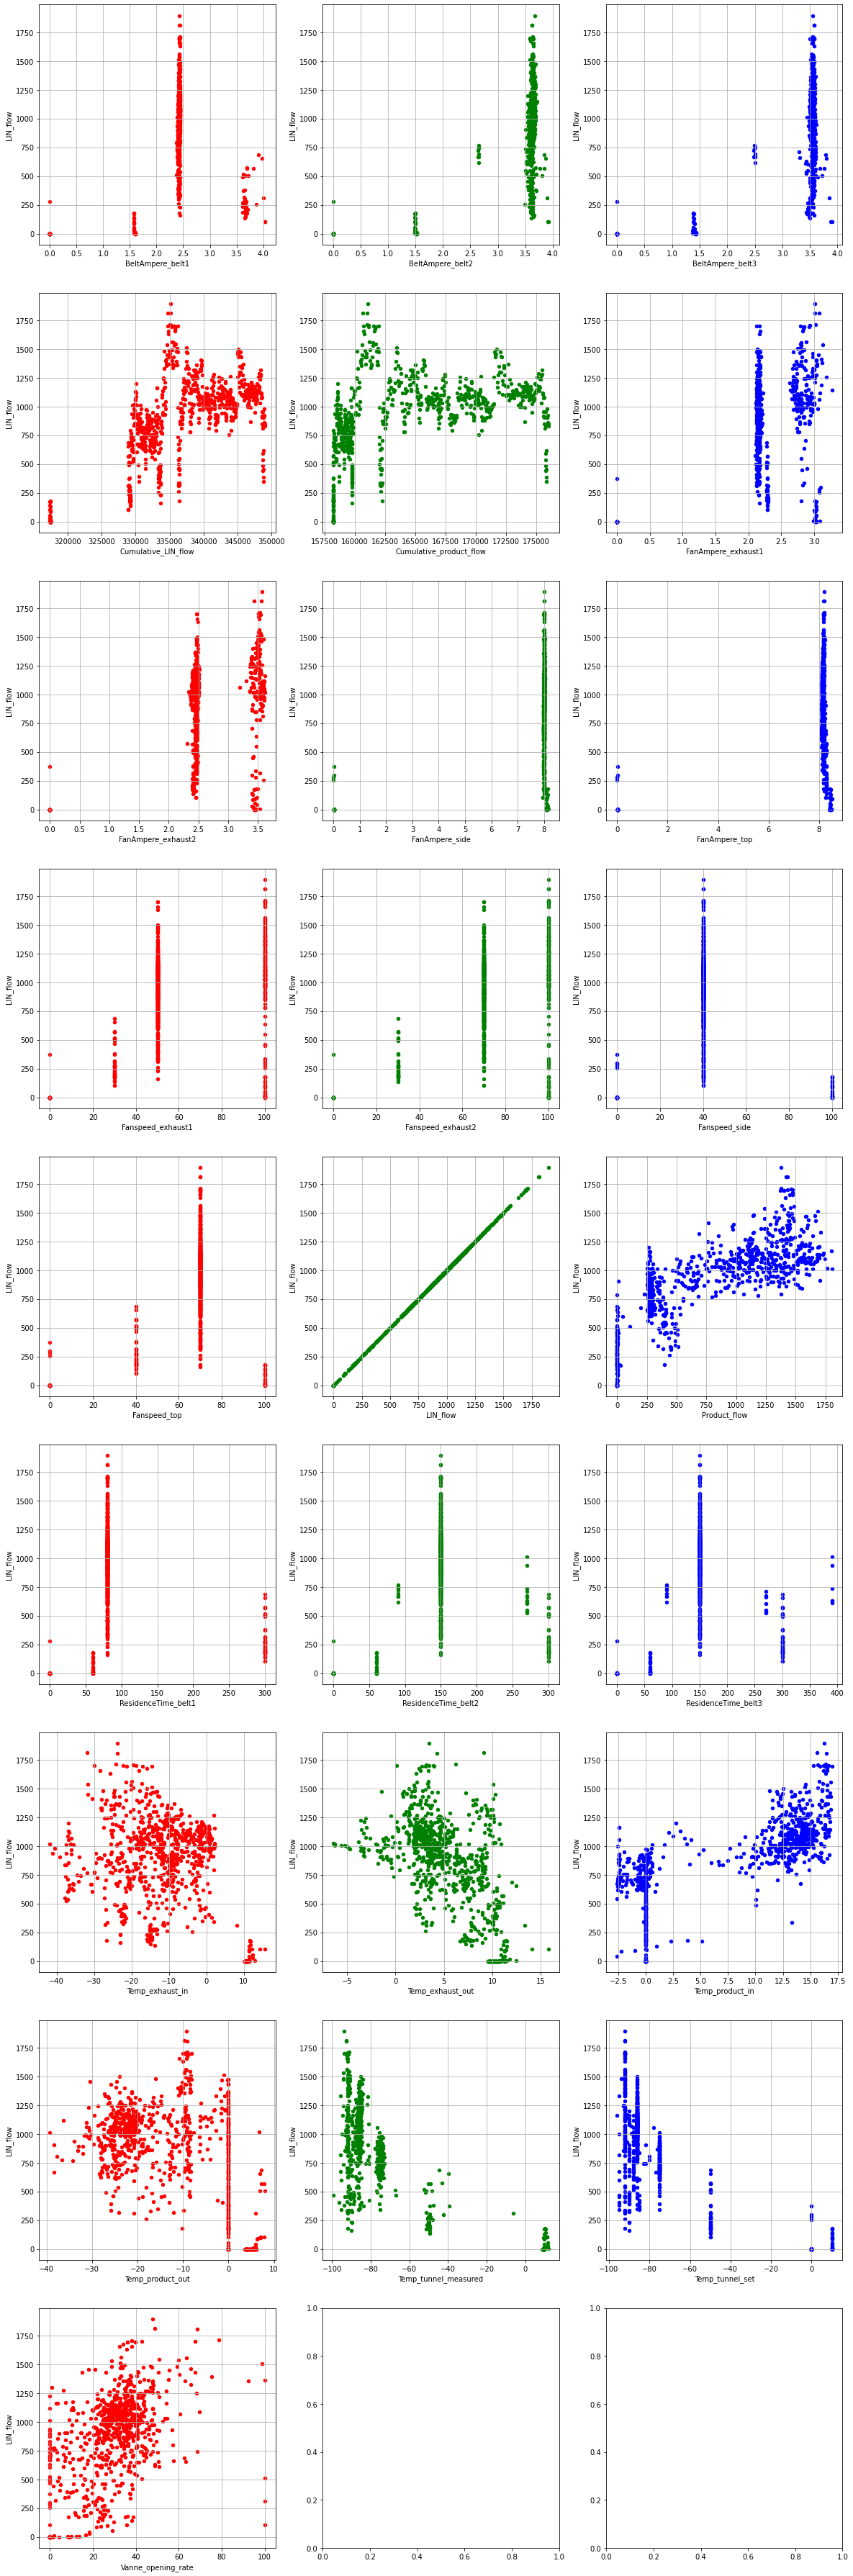

In [31]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 65))
colormap = ["red", "green", "blue"]
for idx, feature in enumerate(x.columns[:-1]):
    x.plot(feature, "LIN_flow", subplots=True, kind="scatter", 
           ax=axes[idx // 3, idx % 3], color=colormap[idx % 3], grid=True)

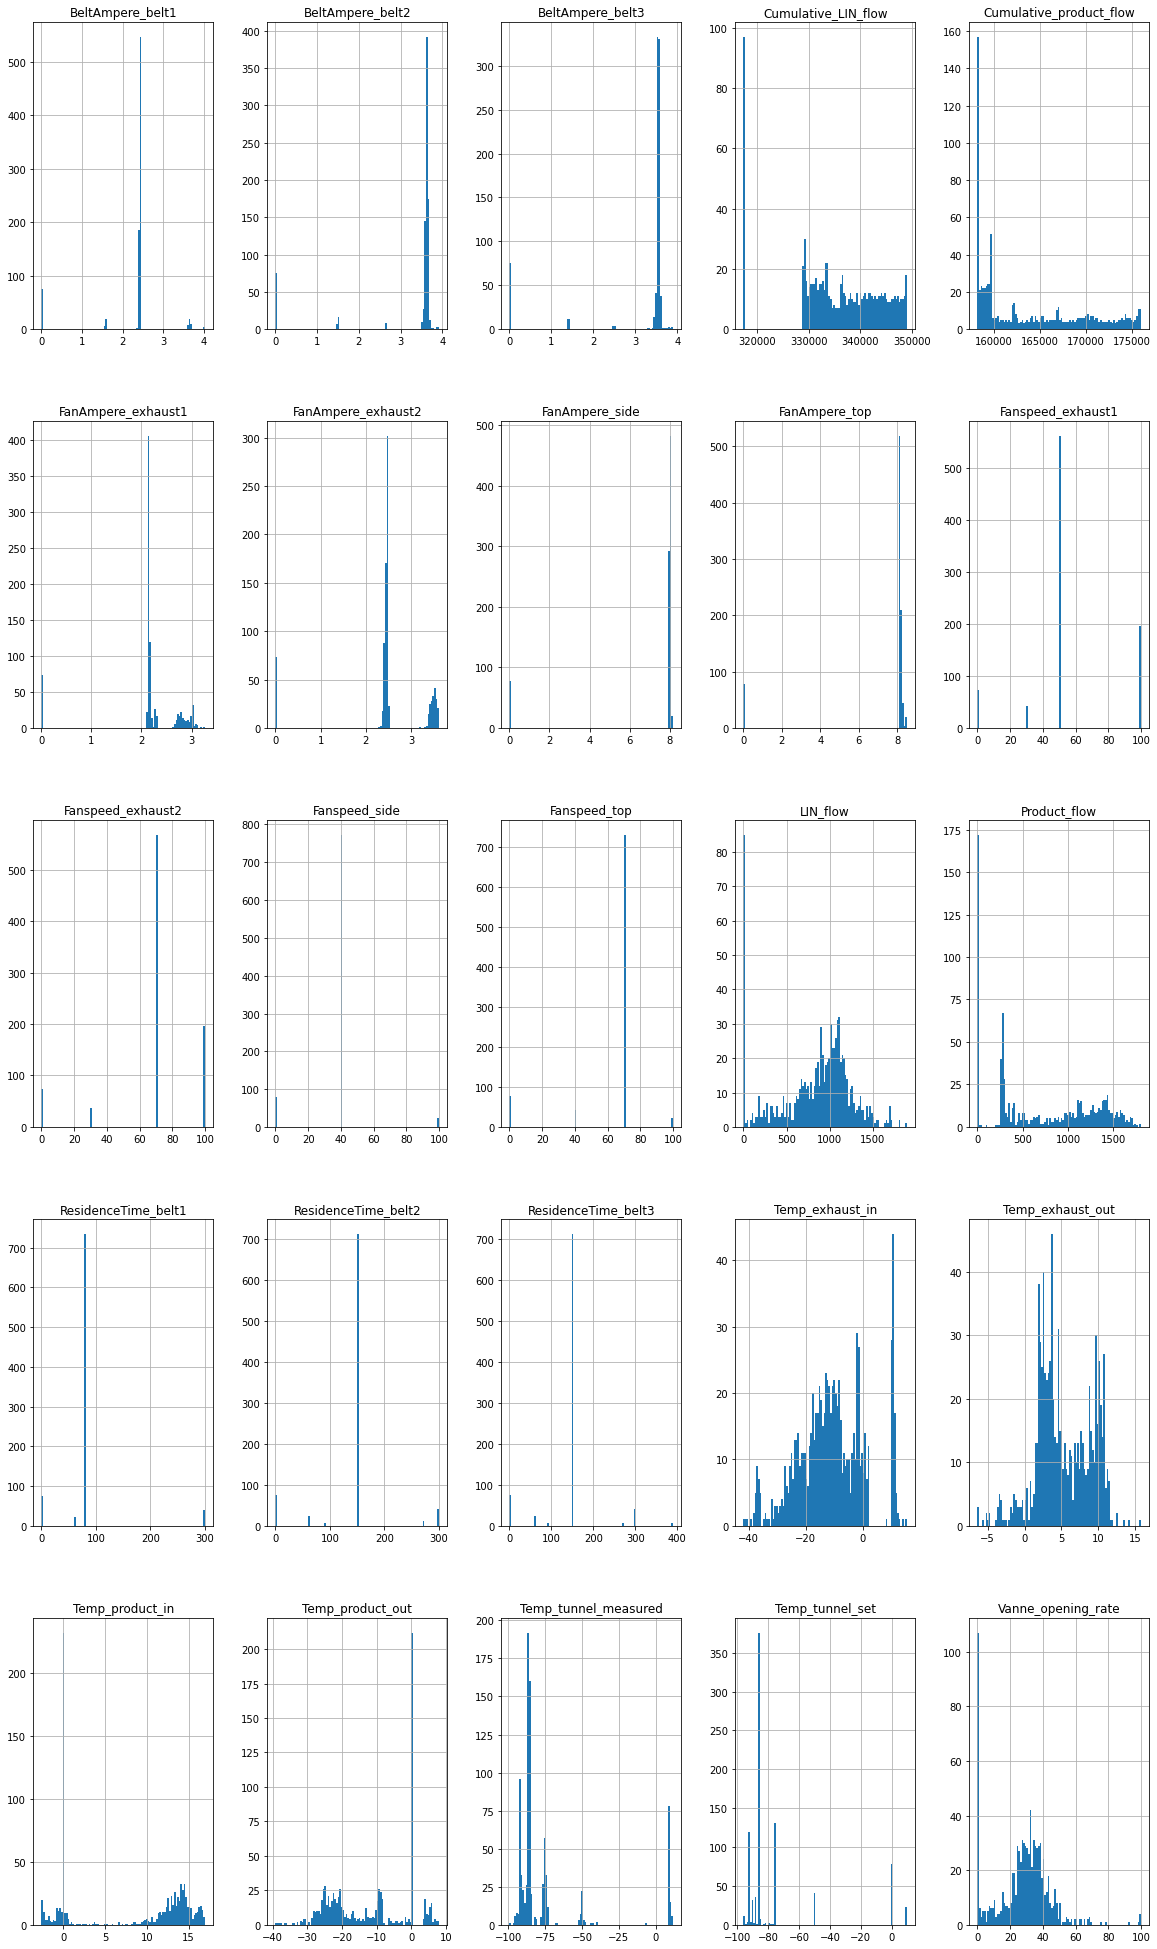

In [32]:
x.hist(figsize=(20, 35), bins=100);

In [33]:
x.mean()

BeltAmpere_belt1                2.254012
BeltAmpere_belt2                3.251982
BeltAmpere_belt3                3.176659
Cumulative_LIN_flow        335716.195652
Cumulative_product_flow    164111.508009
FanAmpere_exhaust1              2.140240
FanAmpere_exhaust2              2.481412
FanAmpere_side                  7.294226
FanAmpere_top                   7.437878
Fanspeed_exhaust1              56.052632
Fanspeed_exhaust2              69.187643
Fanspeed_side                  38.009153
Fanspeed_top                   63.066362
LIN_flow                      835.616443
Product_flow                  738.982124
ResidenceTime_belt1            82.929062
ResidenceTime_belt2           143.032037
ResidenceTime_belt3           143.855835
Temp_exhaust_in               -10.742906
Temp_exhaust_out                5.211670
Temp_product_in                 7.652874
Temp_product_out              -12.054773
Temp_tunnel_measured          -72.775629
Temp_tunnel_set               -73.620137
Vanne_opening_ra

In [34]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.utils import shuffle
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.iloc[:, :-1])

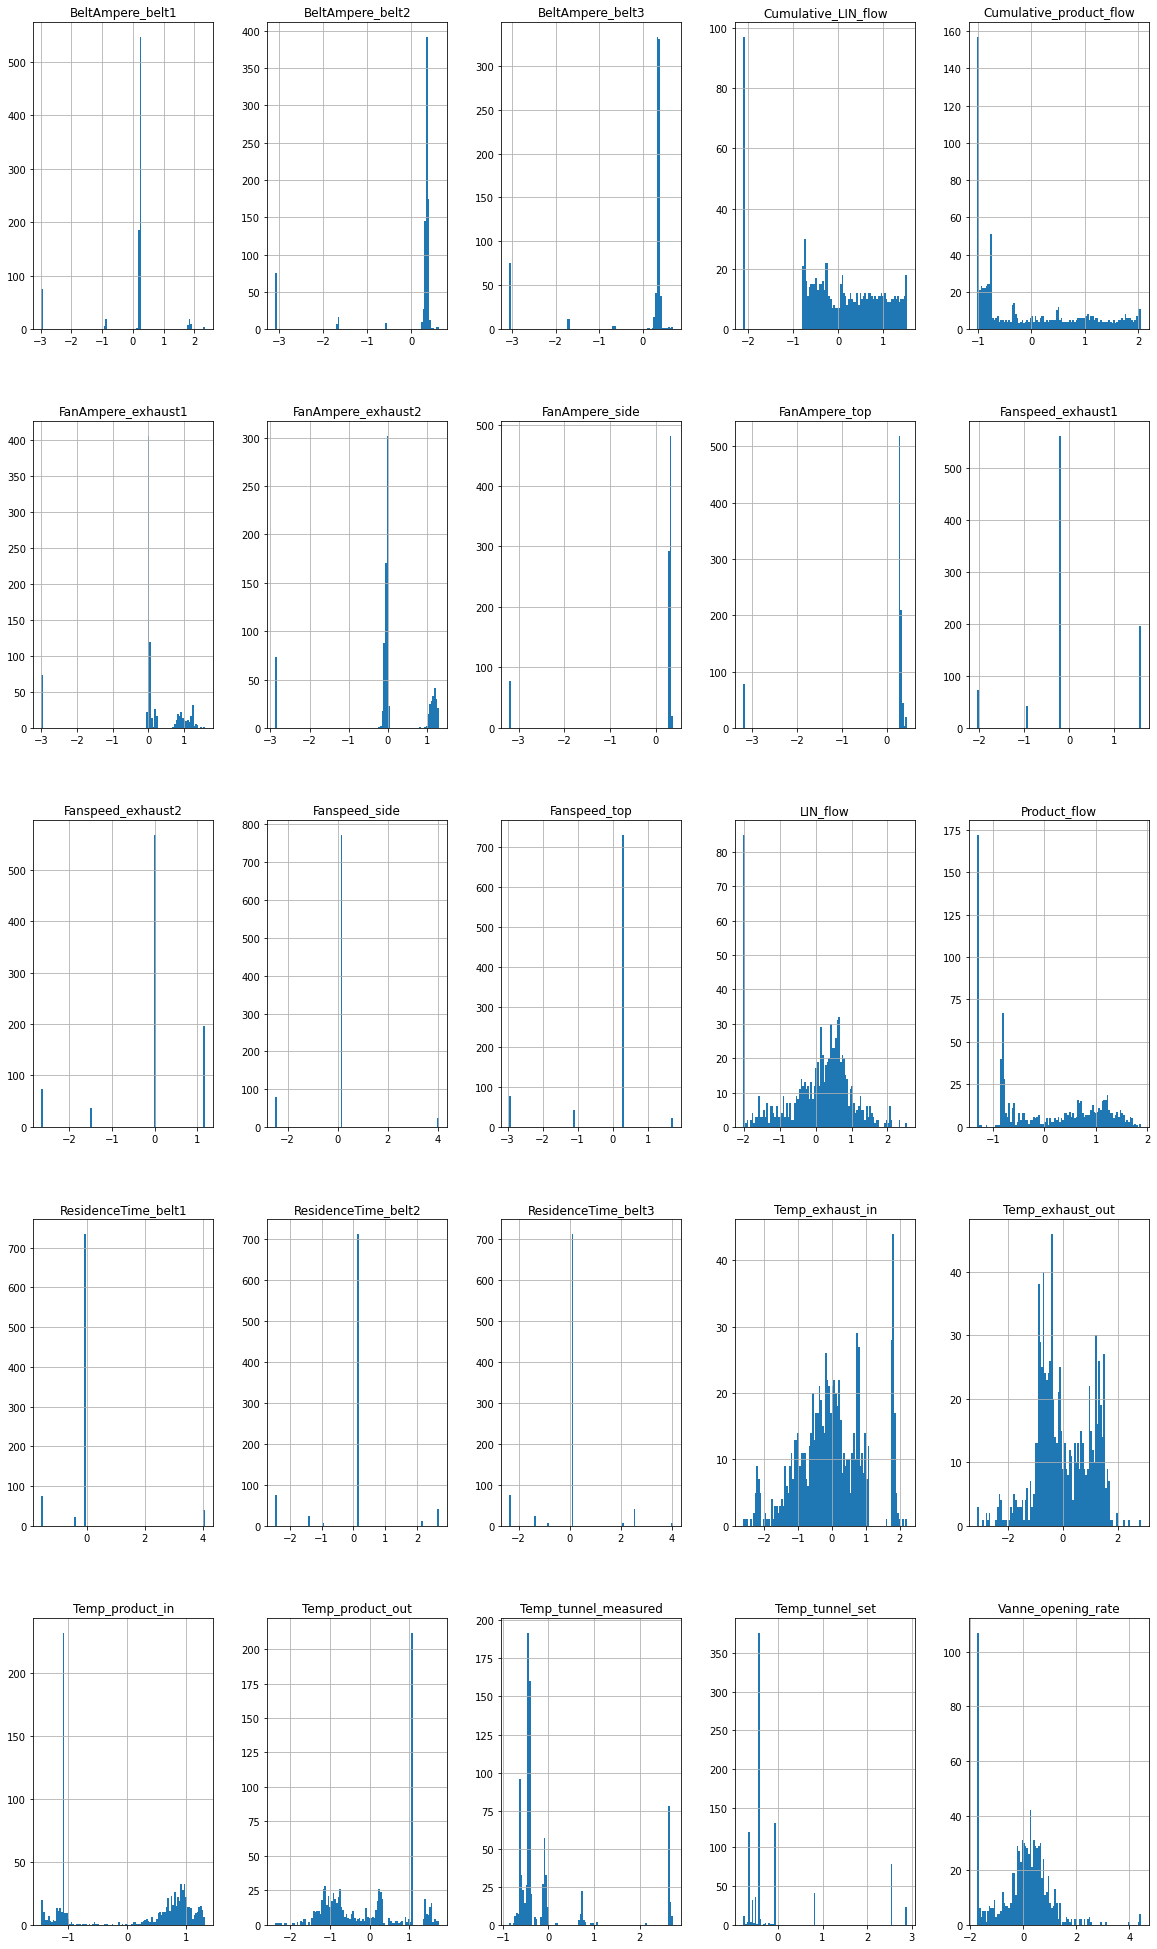

In [37]:
x_scaled = pd.DataFrame(x_scaled, columns=named_cols)
x_scaled.hist(figsize=(20, 35), bins=100);

In [38]:
x_scaled

array([[-0.90340683, -1.6813225 , -1.73792264, ...,  2.73305303,
         2.89248676, -1.21422536],
       [-0.90502009, -1.67843373, -1.73851188, ...,  2.72659768,
         2.89248676, -0.60032349],
       [-0.90340683, -1.67438934, -1.73556585, ...,  2.72014234,
         2.89248676,  0.07349934],
       ...,
       [ 0.22587946,  0.316588  ,  0.33900216, ..., -0.42361186,
        -0.42822925, -0.12039926],
       [ 0.2266859 ,  0.38418654,  0.3507861 , ..., -0.42361186,
        -0.42822925, -0.19682883],
       [ 0.23152581,  0.35818695,  0.3219154 , ..., -0.42361186,
        -0.42822925, -0.16081496]])

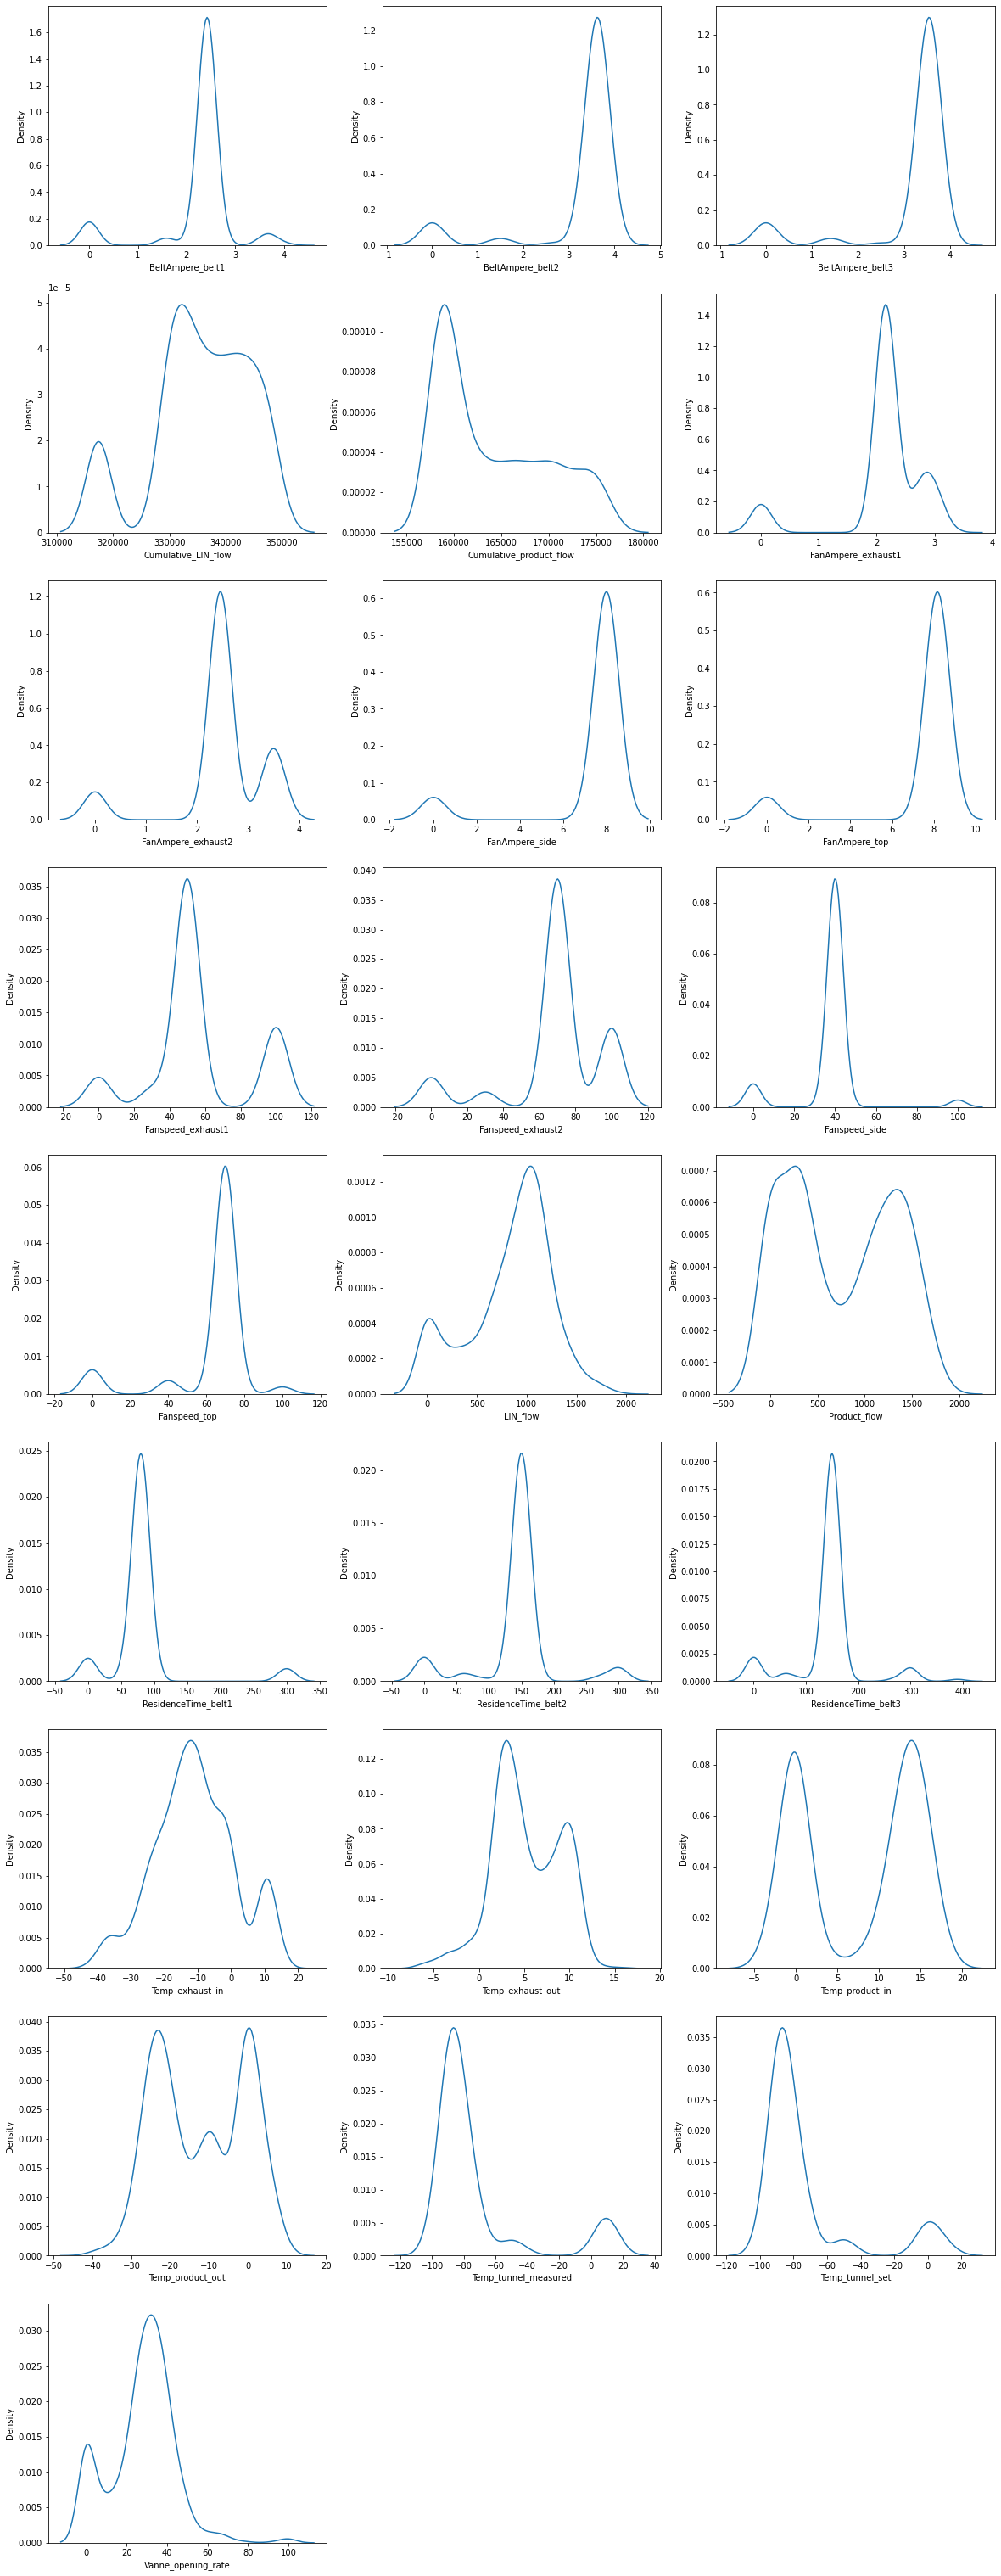

In [38]:
plt.figure(figsize=(20, 55))
for i, feature in enumerate(x_scaled.columns):
    plt.subplot(9, 3, i+1)
    sns.kdeplot(x[feature])
    plt.xlabel(feature)
plt.show()


In [49]:
x.drop(["Cumulative_LIN_flow","Cumulative_product_flow"], 1,inplace=True)
df_shuffled = shuffle(x, random_state=123)
X = df_shuffled[df_shuffled.columns[:-1]]
X = scale(df_shuffled.drop(["LIN_flow", "_time"], 1))
y = df_shuffled["LIN_flow"]

df_shuffled = df_shuffled.drop(["LIN_flow"], 1)
print(X)
print('\n')
print(y)

[[ 0.22910599  0.35876476  0.40263563 ... -0.60758927 -0.635774
   0.69408242]
 [ 0.22265294  0.38071986  0.37376493 ... -0.43006721 -0.42822925
   0.24299895]
 [ 0.21619976  0.37840881  0.34548347 ... -0.45911627 -0.42822925
  -0.28666982]
 ...
 [ 0.2363656   0.34547626  0.37317568 ... -0.53335277 -0.60118321
   1.77688313]
 [ 0.22749272  0.32814326  0.35667816 ... -0.53658044 -0.56659242
   0.58763336]
 [ 0.22426607  0.36858679  0.33782376 ... -0.43652256 -0.42822925
   0.13334434]]


372    1133.463900
517    1315.660400
791    1086.152700
145     691.787000
151     938.515260
          ...     
98      103.925545
322     883.739900
382     931.782700
365     876.326800
510     939.815250
Name: LIN_flow, Length: 874, dtype: float64


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regr = LinearRegression()
regr.fit(X, y)
print('Коэффициенты: ')
list(zip(df_shuffled.columns, regr.coef_))

Коэффициенты: 


[('BeltAmpere_belt1', -7.685966066290491),
 ('BeltAmpere_belt2', -762.4941671979554),
 ('BeltAmpere_belt3', 878.0205409627753),
 ('FanAmpere_exhaust1', 145.75130972594047),
 ('FanAmpere_exhaust2', -394.03894502620165),
 ('FanAmpere_side', -2099.561830021806),
 ('FanAmpere_top', 2885.0779179146875),
 ('Fanspeed_exhaust1', 164.84718598788285),
 ('Fanspeed_exhaust2', 103.22314467024965),
 ('Fanspeed_side', -534.8599505018605),
 ('Fanspeed_top', 87.2108049858664),
 ('Product_flow', 102.27851891002014),
 ('ResidenceTime_belt1', -68.8136095360171),
 ('ResidenceTime_belt2', -101.2468173430057),
 ('ResidenceTime_belt3', 14.059353915136747),
 ('Temp_exhaust_in', -77.03547487650843),
 ('Temp_exhaust_out', -69.40040982617404),
 ('Temp_product_in', 165.91726255877418),
 ('Temp_product_out', 15.326276471633555),
 ('Temp_tunnel_measured', -81.44466467505696),
 ('Temp_tunnel_set', 503.3463124171852),
 ('Vanne_opening_rate', 18.368547880259058)]

In [52]:
from sklearn.linear_model import Lasso, Ridge

In [53]:
regLasso = Lasso()
regLasso.fit(X, y)
print('Коэффициенты:')
list(zip(df_shuffled.columns, regLasso.coef_))

Коэффициенты:


[('BeltAmpere_belt1', -0.0),
 ('BeltAmpere_belt2', 0.0),
 ('BeltAmpere_belt3', 160.97598854880783),
 ('FanAmpere_exhaust1', 5.797595490608341),
 ('FanAmpere_exhaust2', -0.0),
 ('FanAmpere_side', 101.36235017054551),
 ('FanAmpere_top', 0.0),
 ('Fanspeed_exhaust1', 23.27849898350052),
 ('Fanspeed_exhaust2', 0.0),
 ('Fanspeed_side', -112.60806814936146),
 ('Fanspeed_top', 42.57496094379288),
 ('Product_flow', 113.82928481518758),
 ('ResidenceTime_belt1', -21.13162434717857),
 ('ResidenceTime_belt2', -74.79775598086914),
 ('ResidenceTime_belt3', -0.0),
 ('Temp_exhaust_in', -76.47517668796071),
 ('Temp_exhaust_out', -41.79320740780318),
 ('Temp_product_in', 111.82112951914705),
 ('Temp_product_out', 0.45952153194706286),
 ('Temp_tunnel_measured', 18.551041927706578),
 ('Temp_tunnel_set', 49.44812683059354),
 ('Vanne_opening_rate', 24.815029059962992)]

In [129]:
regRidge = Ridge()
regRidge.fit(X, y)
print('Коэффициенты: ')
list(zip(df_shuffled.columns, regRidge.coef_))

Коэффициенты: 


[('BeltAmpere_belt1', -21.756895228446382),
 ('BeltAmpere_belt2', 30.66856322634389),
 ('BeltAmpere_belt3', 281.12304152293973),
 ('Cumulative_LIN_flow', -413.6967483707529),
 ('Cumulative_product_flow', 225.36090242421065),
 ('FanAmpere_exhaust1', 135.36491725973073),
 ('FanAmpere_exhaust2', -212.46075088636726),
 ('FanAmpere_side', 167.73315456090313),
 ('FanAmpere_top', 245.82796152855056),
 ('Fanspeed_exhaust1', 70.41877727539647),
 ('Fanspeed_exhaust2', 57.88167896123637),
 ('Fanspeed_side', -352.13999238406575),
 ('Fanspeed_top', 71.4335476582651),
 ('Product_flow', 110.55543687954676),
 ('ResidenceTime_belt1', -14.065897486796622),
 ('ResidenceTime_belt2', -113.26124550617564),
 ('ResidenceTime_belt3', -0.32088673666540884),
 ('Temp_exhaust_in', -47.858447216470196),
 ('Temp_exhaust_out', -52.554919501260265),
 ('Temp_product_in', 165.167906621806),
 ('Temp_product_out', 13.192218415481296),
 ('Temp_tunnel_measured', -113.30737116324698),
 ('Temp_tunnel_set', 256.7090108347167),

In [130]:
# Код 3.1 (1 балл)
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.

for i, item in enumerate(alphas):
    reg_Lasso = Lasso(alpha = alphas[i])
    reg_Lasso.fit(X, y)
    coefs_lasso[i,:] = reg_Lasso.coef_

for i, item in enumerate(alphas):
    reg_Ridge = Ridge(alpha = alphas[i])
    reg_Ridge.fit(X, y)
    coefs_ridge[i,:] = reg_Ridge.coef_

Text(0.5, 1.0, 'Ridge')

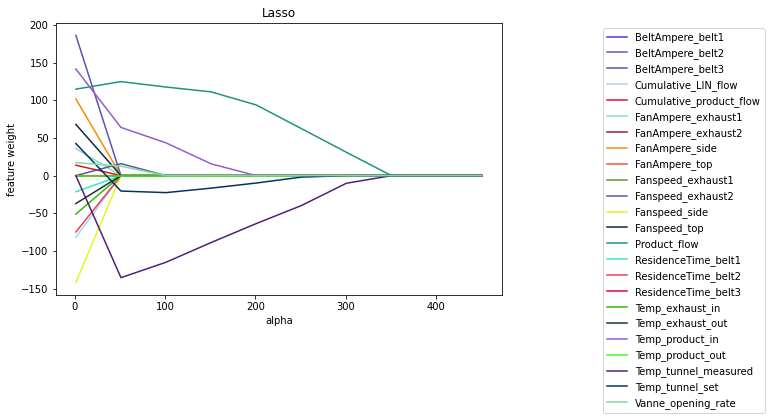

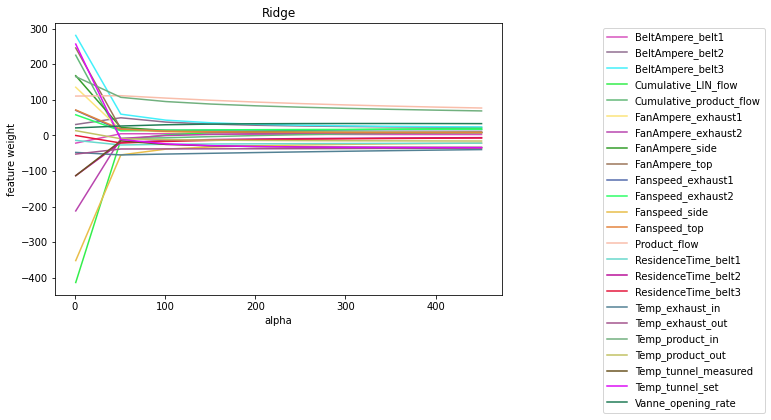

In [131]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df_shuffled.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
    
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 1))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_ridge.T, df_shuffled.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
    
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 1))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [132]:
from sklearn.linear_model import LassoCV

Матрица переменной mse_path_: 
 [[35503.95283035 44808.46465247 42312.9295626  48007.7953782
  50045.73162014]
 [34475.97751014 43631.19573445 40873.89405517 46801.26114225
  48435.09000262]
 [33508.94213543 42515.51107246 39510.94212278 45654.50722478
  46815.48670061]
 [32605.64273444 41461.39032462 38224.06633328 44451.49263686
  45217.00116892]
 [31697.27252564 40468.83025735 37013.21765027 43205.93028253
  43709.00900936]
 [30866.33508522 39537.8303565  35826.96273851 41998.21475623
  42291.3795505 ]
 [30112.83876026 38668.39054037 34658.55658469 40862.07237732
  40964.16593087]
 [29436.78515667 37860.44740332 33571.74372327 39797.06750333
  39727.38064688]
 [28838.19019715 37114.11970372 32571.12854213 38803.36859496
  38581.11192265]
 [28280.34309411 36318.70306944 31656.72900679 37880.97888122
  37486.86718222]
 [27713.59088576 35411.52330538 30828.55099651 37029.88916435
  36398.34865437]
 [27243.44235658 34527.49173947 29903.81466615 36126.76898817
  35420.3405057 ]
 [26869.7

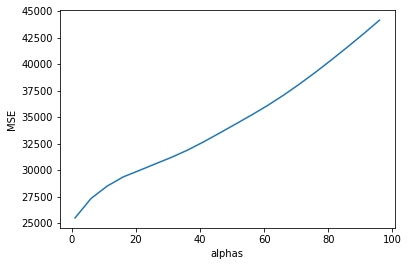

Выбранное alpha: 1 

Вектор коэффициентов для выбранного alpha:


[('BeltAmpere_belt1', -0.0),
 ('BeltAmpere_belt2', 0.0),
 ('BeltAmpere_belt3', 185.957580535992),
 ('Cumulative_LIN_flow', -81.83147800339272),
 ('Cumulative_product_flow', 13.850356437922853),
 ('FanAmpere_exhaust1', 35.8206296589792),
 ('FanAmpere_exhaust2', -0.0),
 ('FanAmpere_side', 101.7719473392673),
 ('FanAmpere_top', 0.0),
 ('Fanspeed_exhaust1', 0.0),
 ('Fanspeed_exhaust2', 0.0),
 ('Fanspeed_side', -141.69798307369177),
 ('Fanspeed_top', 67.94451613608516),
 ('Product_flow', 114.70678866960577),
 ('ResidenceTime_belt1', -21.423339366467484),
 ('ResidenceTime_belt2', -74.75737239639757),
 ('ResidenceTime_belt3', -0.06742162085195999),
 ('Temp_exhaust_in', -50.91532146464874),
 ('Temp_exhaust_out', -37.01888514601227),
 ('Temp_product_in', 141.38985035152288),
 ('Temp_product_out', 0.0),
 ('Temp_tunnel_measured', 0.0),
 ('Temp_tunnel_set', 42.5839436025951),
 ('Vanne_opening_rate', 17.233525695703506)]

In [133]:
# Код 3.2 (1 балл)
# Обучите регрессор LassoCV на всех параметрах регуляризации из alpha
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов

alphas = np.arange(1, 100, 5)
regLassoCV = LassoCV(alphas=alphas)
regLassoCV.fit(X, y)
print('Матрица переменной mse_path_: \n', regLassoCV.mse_path_)

plt.plot(regLassoCV.alphas_, regLassoCV.mse_path_.mean(axis=1))
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()

print('Выбранное alpha:', regLassoCV.alpha_, '\n')
print('Вектор коэффициентов для выбранного alpha:')
list(zip(df_shuffled.columns, regLassoCV.coef_))

[1, 1, 1]

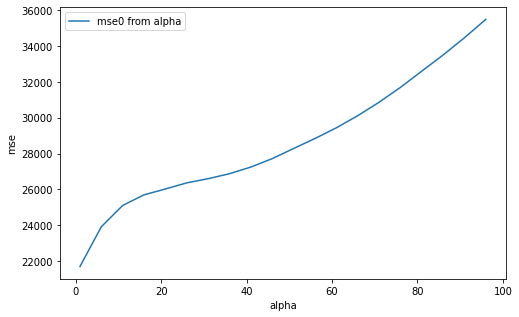

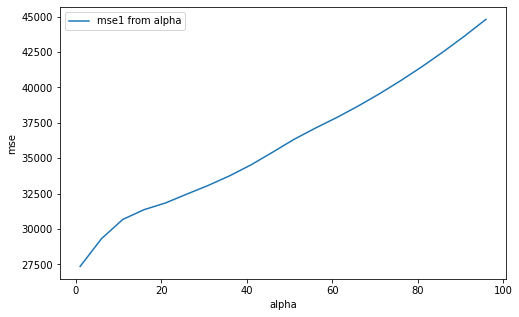

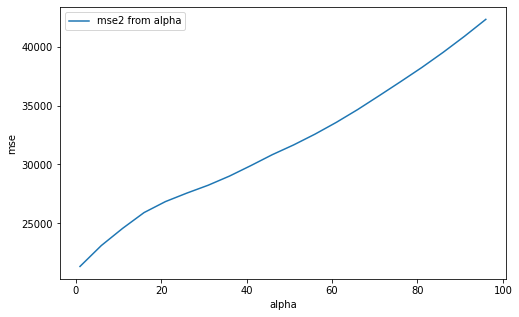

In [134]:
min_alphas = []
for i in range(3):
    z = dict(zip(regLassoCV.alphas_, regLassoCV.mse_path_[:, i]))
    min_alphas.append(sorted(z, key=z.get)[0])
    plt.figure(figsize=(8, 5))
    plt.plot(regLassoCV.alphas_, regLassoCV.mse_path_[:, i], label='mse{} from alpha'.format(i))
    plt.legend(loc='best')
    plt.xlabel('alpha')
    plt.ylabel('mse')

min_alphas